In [1]:
import matplotlib 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rc
%matplotlib inline
rc('text', usetex=True)
font = {'weight' : 'bold','size'   : 22}
matplotlib.rc('font', **font)
#############################################
import warnings
warnings.filterwarnings("ignore")
#############################################
import os,sys
import numpy as np
import healpy as hp
import healpy.newvisufunc as hpn
import astropy.io.fits as fits
import pysm3
import pysm3.units as u
#############################################
sys.path.insert(1, '/home/marins/HDext/Computer/Programmation/Codes/beam_analyzes/scripts')
import beam_modelling         as model
import handling_data          as hdata
import parameters_and_setting as parset
import plot_setting           as pset
#############################################fontsize=14, rotation=90
c = 2*['black', 'dimgray', 'dimgrey', 'gray', 'grey', 'darkgray',       'darkgrey', 'silver', 'lightgray', 'lightgrey', 'gainsboro',
       'whitesmoke', 'white', 'snow', 'rosybrown', 'lightcoral',       'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red',
       'mistyrose', 'salmon', 'tomato', 'darksalmon', 'coral',       'orangered', 'lightsalmon', 'sienna', 'seashell', 'chocolate',
       'saddlebrown', 'sandybrown', 'peachpuff', 'peru', 'linen',       'bisque', 'darkorange', 'burlywood', 'antiquewhite', 'tan',
       'navajowhite', 'blanchedalmond', 'papayawhip', 'moccasin',       'orange', 'wheat', 'oldlace', 'floralwhite', 'darkgoldenrod',
       'goldenrod', 'cornsilk', 'gold', 'lemonchiffon', 'khaki',       'palegoldenrod', 'darkkhaki', 'ivory', 'beige', 'lightyellow',
       'lightgoldenrodyellow', 'olive', 'yellow', 'olivedrab',       'yellowgreen', 'darkolivegreen', 'greenyellow', 'chartreuse',
       'lawngreen', 'honeydew', 'darkseagreen', 'palegreen', 'lightgreen',       'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime',
       'seagreen', 'mediumseagreen', 'springgreen', 'mintcream',       'mediumspringgreen', 'mediumaquamarine', 'aquamarine', 'turquoise',
       'lights2727eagreen', 'mediumturquoise', 'azure', 'lightcyan',       'paleturquoise', 'darkslategray', 'darkslategrey', 'teal',
       'darkcyan', 'aqua', 'cyan', 'darkturquoise', 'cadetblue',       'powderblue', 'lightblue', 'deepskyblue', 'skyblue',
       'lightskyblue', 'steelblue', 'aliceblue', 'dodgerblue',       'lightslategray', 'lightslategrey', 'slategray', 'slategrey',
       'lightsteelblue', 'cornflowerblue', 'royalblue', 'ghostwhite',       'lavender', 'midnightblue', 'navy', 'darkblue', 'mediumblue',
       'blue', 'slateblue', 'darkslateblue', 'mediumslateblue',       'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo',
       'darkorchid', 'darkviolet', 'mediumorchid', 'thistle', 'plum',       'violet', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid',
       'mediumvioletred', 'deeppink', 'hotpink', 'lavenderblush',       'palevioletred', 'crimson', 'pink', 'lightpink']
markers_ = 2*[".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","x","X","D","d",0,1,2,3,4,5,6,7,8,9,10,11]

In [2]:
nbands = 30
nu_max = 1260
nu_min = 980
nu_step = (nu_max-nu_min)/nbands
nu = np.around(np.arange(nu_min,nu_max,nu_step),decimals=2)

In [3]:
path_HI = "/home/marins/HDext/Computer/Programmation/BINGO/Component Separation/maps/HImaps"
dir_HI  = "512__980_1260MHz_30bins"
HI      = hdata.building_cubemaps(dirpath_=path_HI, dirname_=dir_HI, healpix_readingformat=True)

In [4]:
i = -1
nside = hp.get_nside(HI[i])
lmax  = 3*nside
l     = np.arange(lmax+1)
theta = np.arange(0,10,0.01)
fwhm  = model.fwhm_modelling(nu=nu[i],type_='smooth', D=40, in_degree=True)
blg   = model.bl_function(type_="gaussian", fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")
blc   = model.bl_function(type_="cosine"  , fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")
blj   = model.bl_function(type_="jinc"    , fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")

cl = hp.anafast(HI[i],lmax=lmax, pol=False)

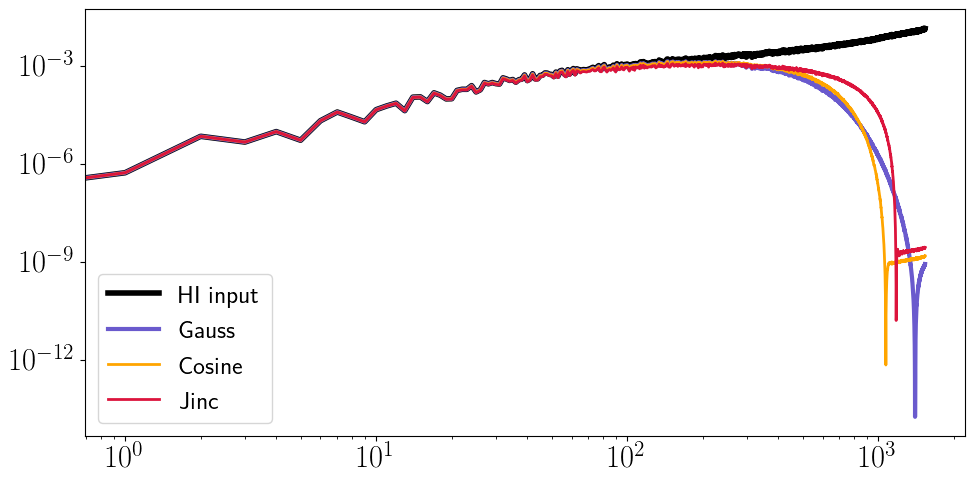

In [5]:
grid = plt.GridSpec(1,1,top=1.,right=1.5,wspace=0.03)
ax = plt.subplot(grid[0,0])
fact = l*(l+1)/(2*np.pi)
plt.plot(l,fact*cl,          label="HI input"   , linewidth=4, color=c[0])
plt.plot(l,fact*cl*(blg**2), label="Gauss" , linewidth=3,      color=c[122])
plt.plot(l,fact*cl*(blc**2), label="Cosine"  , linewidth=2,    color=c[194])
plt.plot(l,fact*cl*(blj**2), label="Jinc" , linewidth=2,       color=c[145])
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(fontsize="small");

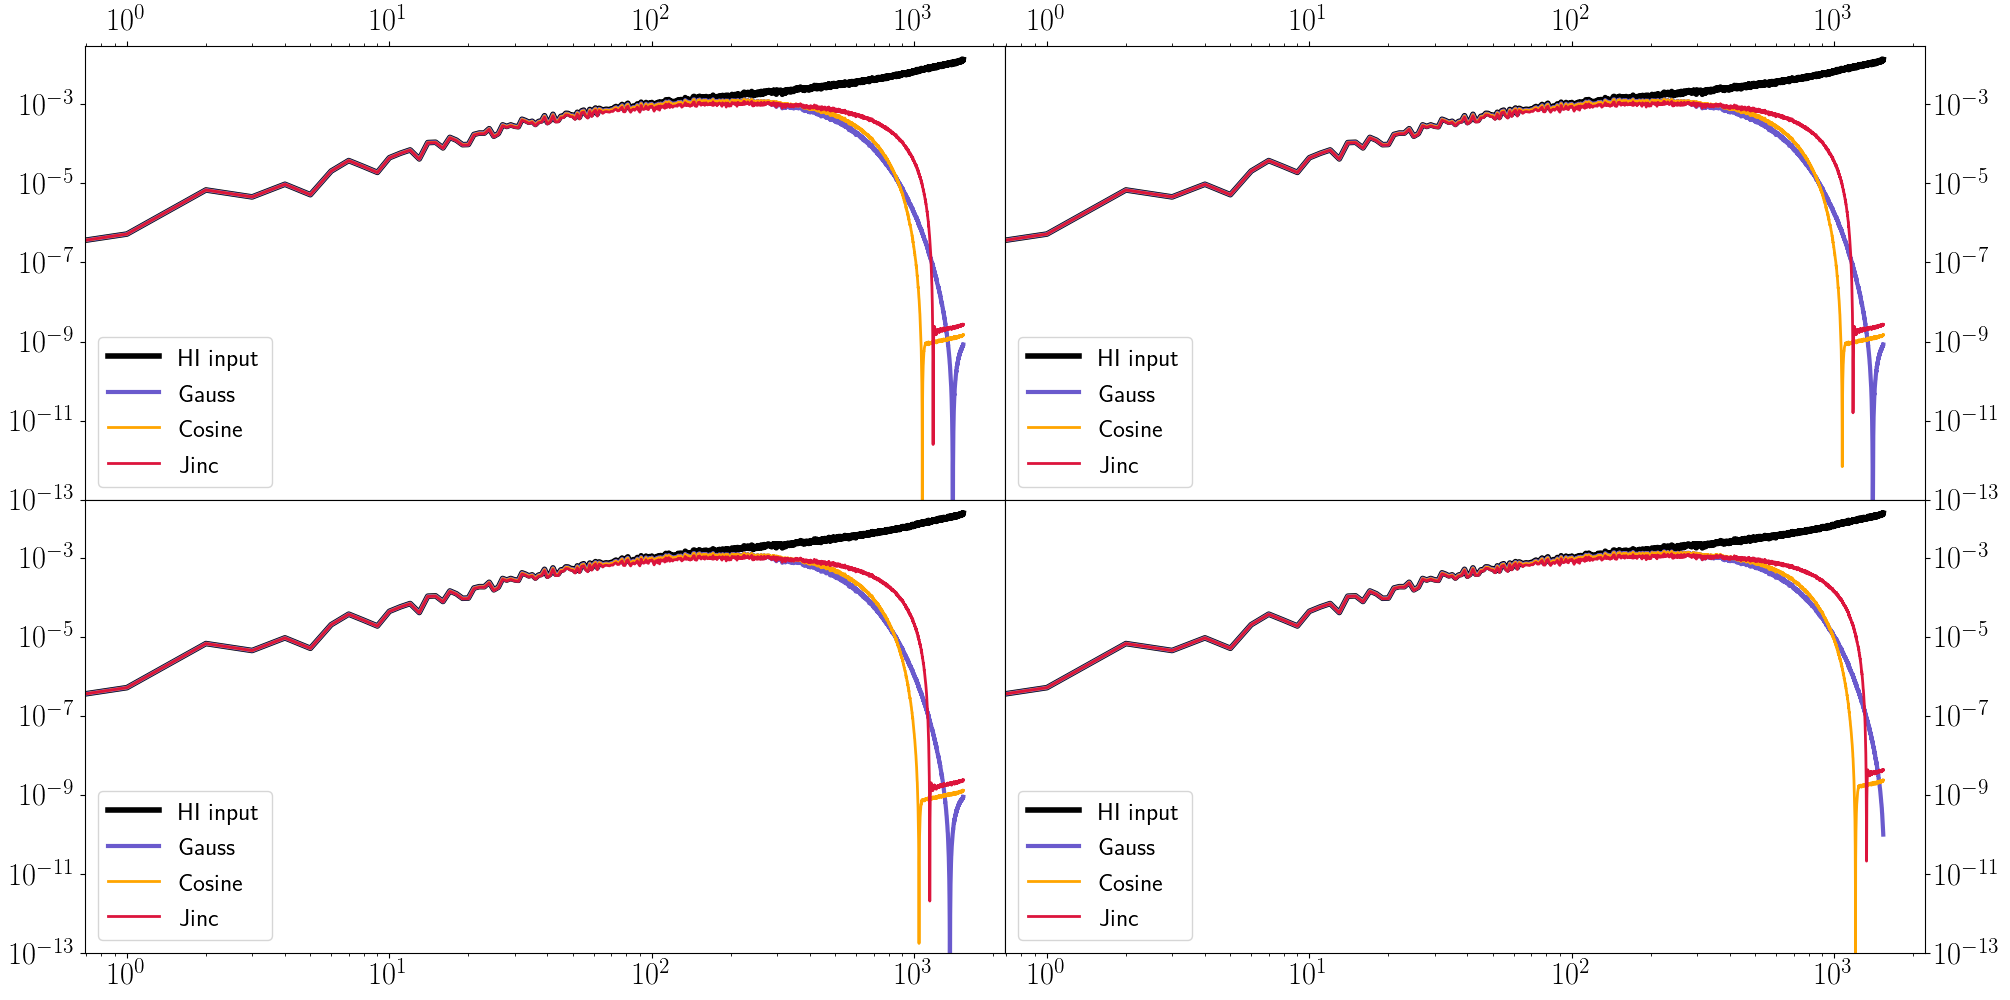

In [6]:
i = -1
nside = hp.get_nside(HI[i])
lmax  = 3*nside
l     = np.arange(lmax+1)
theta = np.arange(0,10,0.01)
type_fwhm = ['ripple', 'smooth','constant','carucci2020']
grid = plt.GridSpec(2,2,top=2*1.,right=2*1.5,wspace=0.0,hspace=0.0)
pos = {0:[0,0],1:[0,1], 2:[1,0],3:[1,1]}
for i,itype in enumerate(type_fwhm):
    fwhm  = model.fwhm_modelling(nu=nu[-1],type_=itype, D=40, in_degree=True)
    blg   = model.bl_function(type_="gaussian", fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")
    blc   = model.bl_function(type_="cosine"  , fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")
    blj   = model.bl_function(type_="jinc"    , fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")

    ax = plt.subplot(grid[pos[i][0],pos[i][1]])
    fact = l*(l+1)/(2*np.pi)
    plt.plot(l,fact*cl,          label="HI input"   , linewidth=4, color=c[0])
    plt.plot(l,fact*cl*(blg**2), label="Gauss" , linewidth=3,      color=c[122])
    plt.plot(l,fact*cl*(blc**2), label="Cosine"  , linewidth=2,    color=c[194])
    plt.plot(l,fact*cl*(blj**2), label="Jinc" , linewidth=2,       color=c[145])    
    #if params["disable_ytick"]: ax.set_yticks([])    
    ax.set_ylim(1e-13,3e-2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    if i==0:
        #ax.spines['right'].set_visible(False)
        ax.xaxis.tick_top()
    elif i==1:
        #ax.spines['left'].set_visible(False)
        #ax.spines['bottom'].set_visible(False)
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
    elif i==2:
        #ax.spines['right'].set_visible(False)
        pass
    elif i==3:
        #ax.spines['top'].set_visible(False)
        #ax.spines['left'].set_visible(False)
        ax.yaxis.tick_right()
    else:
        pass
    #if i in [0,1]: ax.set_xticks([])
    #if i in [1,3]: ax.set_xticks([])
    plt.legend(fontsize="small");

In [7]:
def pyPSM_multires(nu_min=None,nu_max=None,nbands=None,sky_model=None):
    stepf = (nu_max-nu_min)/nbands
    freq = np.around(np.arange(nu_min,nu_max+stepf,stepf),decimals=4) * u.MHz
    for i in range(nbands):
        print(i+1,freq[i:i+2])
        iFG = sky.get_emission(freq[i:i+2]).value #muK
        iFG = hp.Rotator(coord=['G','C']).rotate_map_pixel(iFG)
        #iFG = hp.Rotator(coord=['G','C']).rotate_map_alms(m=iFG,use_pixel_weights=False)  <---it's accurater
        qFG = iFG[1]/1e3
        uFG = iFG[2]/1e3
        iFG = iFG[0]/1e3
        if not i:
            IFG = iFG
            QFG = qFG
            UFG = uFG
        else:
            IFG = np.vstack((IFG,iFG))
            QFG = np.vstack((QFG,qFG))
            UFG = np.vstack((UFG,uFG))
    return {"I":IFG,"Q":QFG,"U":UFG}

In [8]:
from copy import deepcopy as dcopy
sky = pysm3.Sky(nside=512, preset_strings=["s1"])#,"a1","f1","c1"])
FGs = pyPSM_multires(nu_min=980,nu_max=1260,nbands=30,sky_model=sky)
FG = dcopy(FGs)
FG.keys()

1 [980.     989.3333] MHz
2 [989.3333 998.6667] MHz
3 [ 998.6667 1008.    ] MHz
4 [1008.     1017.3333] MHz
5 [1017.3333 1026.6667] MHz
6 [1026.6667 1036.    ] MHz
7 [1036.     1045.3333] MHz
8 [1045.3333 1054.6667] MHz
9 [1054.6667 1064.    ] MHz
10 [1064.     1073.3333] MHz
11 [1073.3333 1082.6667] MHz
12 [1082.6667 1092.    ] MHz
13 [1092.     1101.3333] MHz
14 [1101.3333 1110.6667] MHz
15 [1110.6667 1120.    ] MHz
16 [1120.     1129.3333] MHz
17 [1129.3333 1138.6667] MHz
18 [1138.6667 1148.    ] MHz
19 [1148.     1157.3333] MHz
20 [1157.3333 1166.6667] MHz
21 [1166.6667 1176.    ] MHz
22 [1176.     1185.3333] MHz
23 [1185.3333 1194.6667] MHz
24 [1194.6667 1204.    ] MHz
25 [1204.     1213.3333] MHz
26 [1213.3333 1222.6667] MHz
27 [1222.6667 1232.    ] MHz
28 [1232.     1241.3333] MHz
29 [1241.3333 1250.6667] MHz
30 [1250.6667 1260.    ] MHz


dict_keys(['I', 'Q', 'U'])

<Figure size 800x600 with 0 Axes>

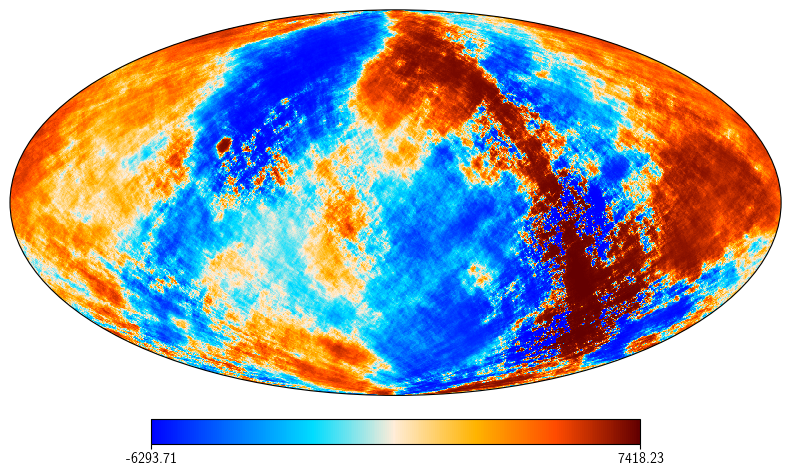

In [9]:
plt.figure(figsize=(8,6))
hpn.projview(FG['U'][0], norm="hist", cmap="planck")

In [10]:
def polarization_leakage(m=None, eps_Q=None,eps_U=None):
    return eps_Q*m['Q']+eps_U*m['U']
def Li_Yang_Gao_coeffs(): #高丽阳2022
    eQ = np.array([0.0, 0.5, 1.0, 2.0, 0.0, 0.5, 1.0, 2.0])/100
    eU = np.array([0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0])/100
    return {"Q":eQ,"U":eU}

In [11]:
LYGcoeff = Li_Yang_Gao_coeffs()
FGpl     = polarization_leakage(m=FG, eps_Q=LYGcoeff['Q'][-1],eps_U=LYGcoeff['U'][-1])

In [12]:
nside_=256
theta_p = np.array([ 100, 100, 100, 247.24, -100, -120, -120, 257.279, -130])#, 100, 0, 30, 45, 80,137,100])      #horizontal
phi_p   = np.array([  40, -40,   0, -49.21, -40,    30,  -30,  -59.58,    0 ])#,  80, 9])#,  0, 90, 10, -10,18]) #vertical
pixs    = np.array([])
for i, (it,ip) in enumerate(zip(theta_p,phi_p)):
    if not i:
        pixs = hp.ang2pix(nside=nside_, theta=it ,phi=ip  ,lonlat=True)
    else:
        pixs = np.vstack((pixs,hp.ang2pix(nside=nside_, theta=it ,phi=ip  ,lonlat=True)))
pixs = np.unique(pixs)
pixs.size

9

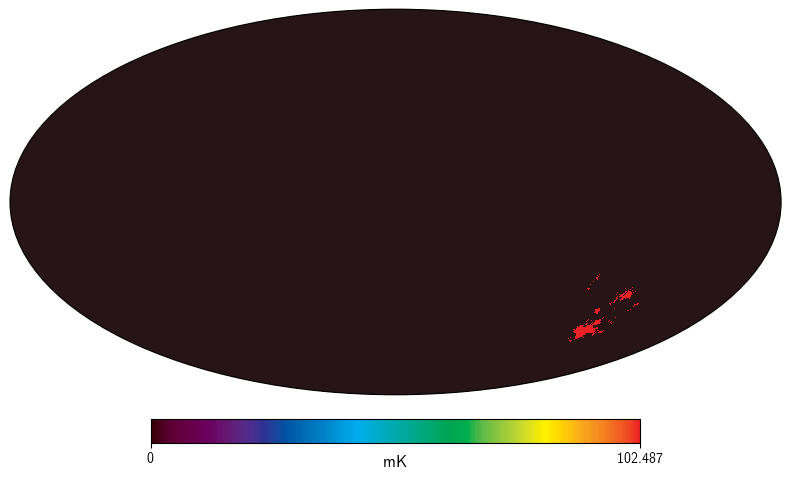

In [27]:
ind  = np.where(FGpl[0]>50)[0]
inds = np.arange(12*nside**2)
ind0 = np.setdiff1d(inds,ind)
FG0 = dcopy(FGpl[0])
FG0[ind0]=0
hpn.projview(FG0,norm="hist",cmap="wmap", unit='mK')

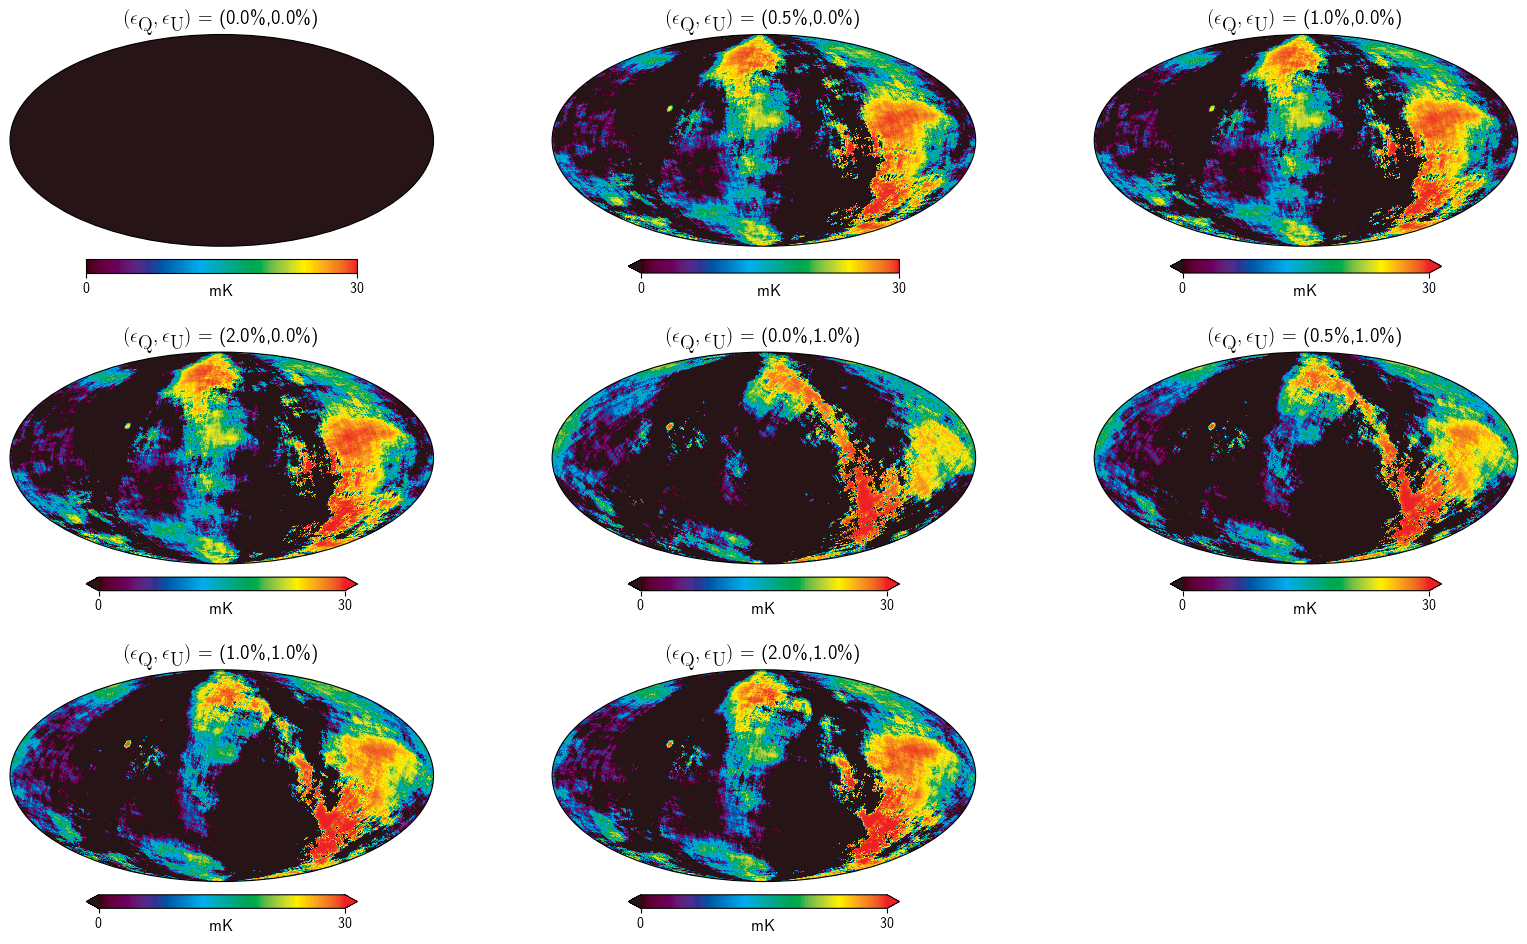

In [14]:
plt.figure(figsize=(16,10))
p = pixs[:]
for k in range(LYGcoeff['Q'].size):linewidths
    FGpl = polarization_leakage(m=FG, eps_Q=LYGcoeff['Q'][k],eps_U=LYGcoeff['U'][k])
    hpn.projview(FGpl[0],norm="hist",cmap="wmap", unit='mK', 
                 title=" = ".join((r"$(\epsilon_{\textrm{Q}},\epsilon_{\textrm{U}})$","({}\%,{}\%)".format(100*LYGcoeff["Q"][k],100*LYGcoeff["U"][k]))),
                 min=0,max=30,
                 sub=int("33{}".format(k+1)))
#plt.savefig("/home/marins/HDext/Computer/Programmation/Codes/beam_analyzes/outputs/{}.jpg".format("Pol_leakage_maps"), dpi=100, bbox_inches='tight')            ;

In [15]:
LYGcoeff = Li_Yang_Gao_coeffs()
params = parset.params_standard()
bands  = np.arange(30)+1

In [16]:
def plot_add_text(x=None,y=None,text=None):
    font = {'family': 'serif',
            'color':  "grey", 
            'weight': 'normal', 
            'size':    16}    
    plt.text(x, y,text, fontdict=font)
    #horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

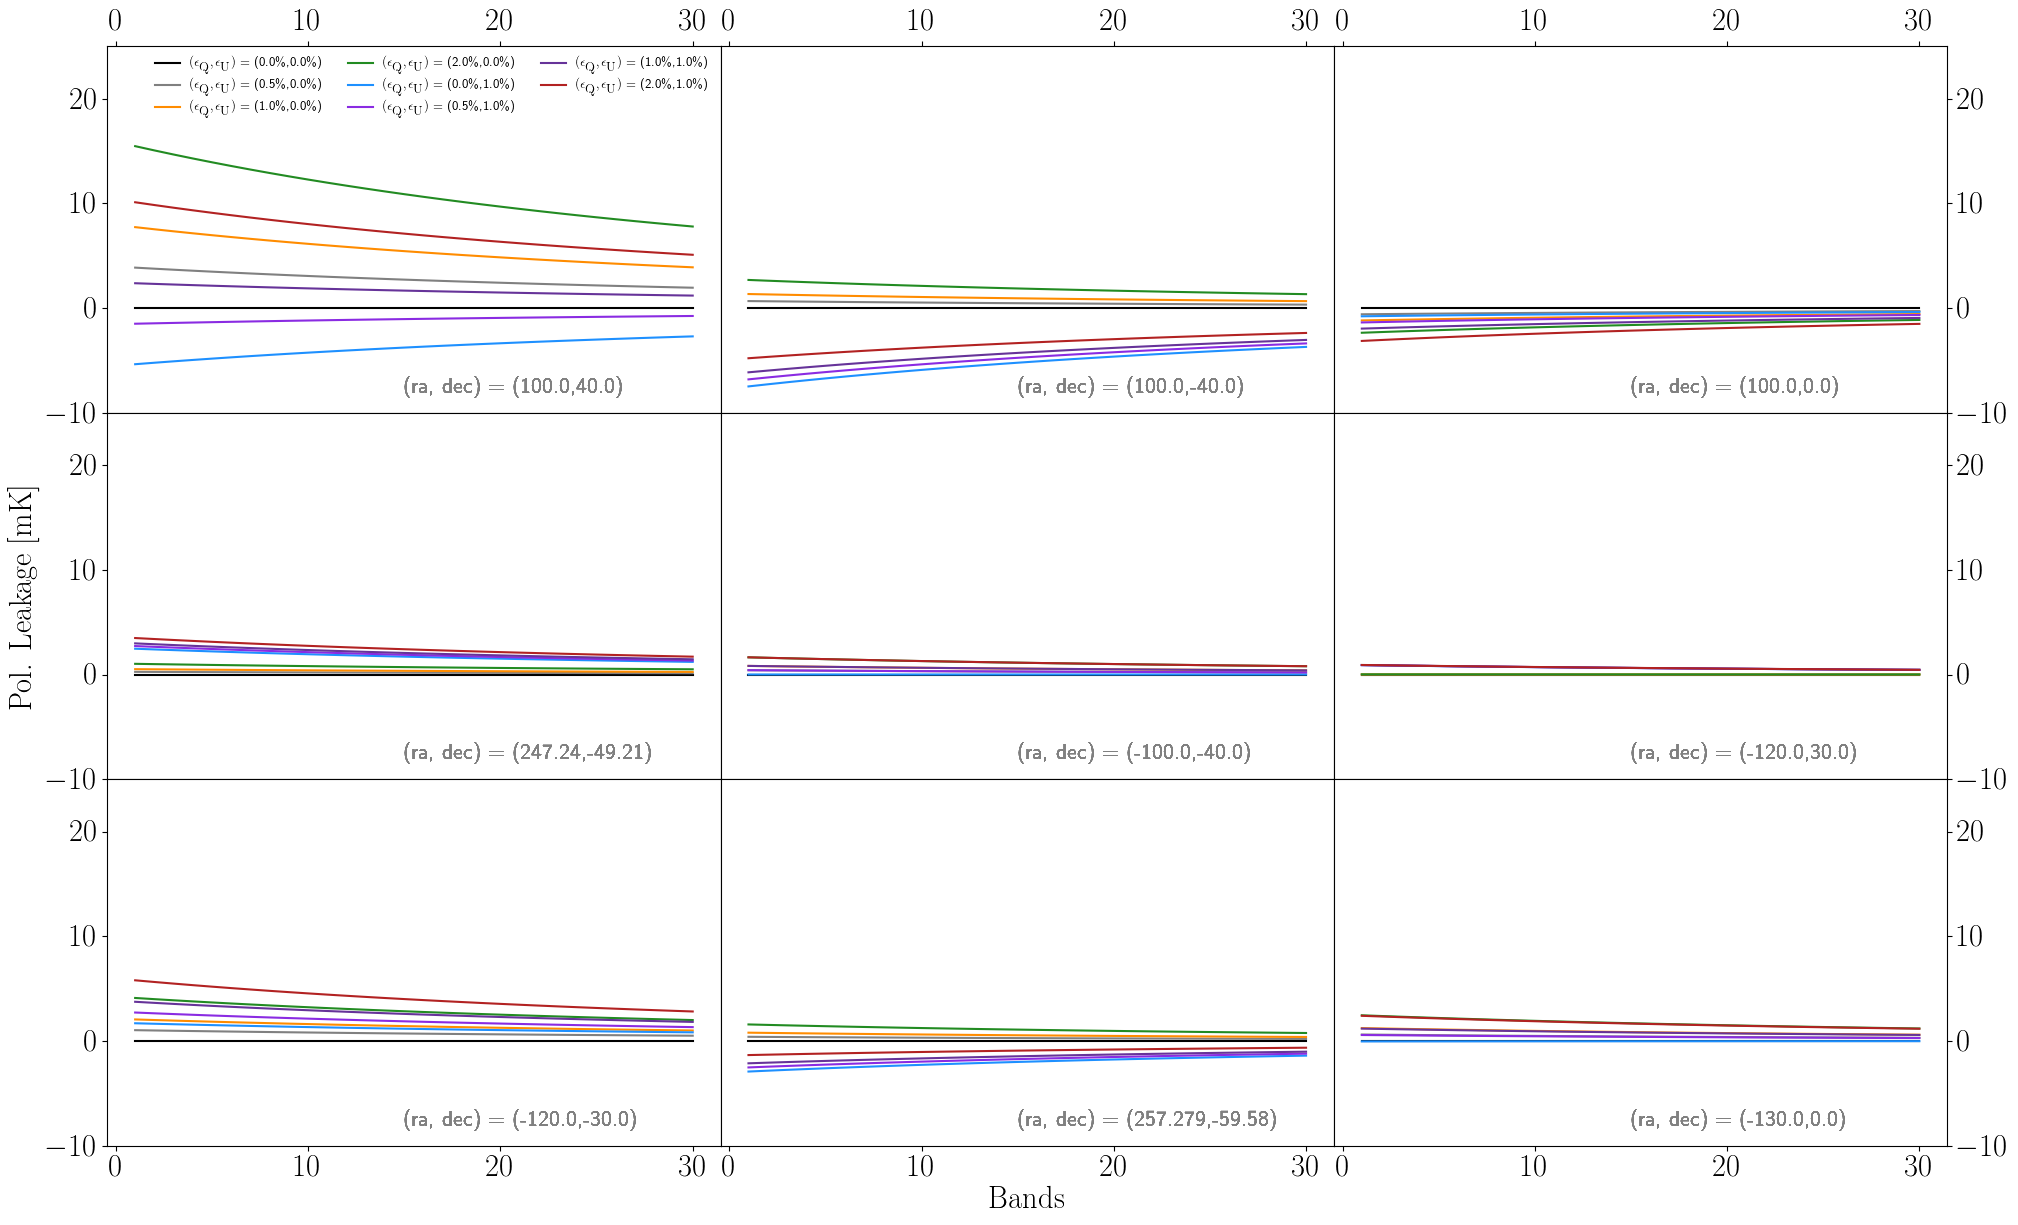

In [17]:
c        = ['black','gray','darkorange','forestgreen','dodgerblue','blueviolet','rebeccapurple','firebrick','orangered']
pos = {0:[0,0],1:[0,1], 2:[0,2],3:[1,0],4:[1,1],5:[1,2],6:[2,0],7:[2,1],8:[2,2]}
p = pixs[:]

grid = plt.GridSpec(3,3,top=3*0.8,right=3*1.,wspace=0.0, hspace=0.0)
for k , ipix in enumerate(p):
    ax = plt.subplot(grid[pos[k][0],pos[k][1]])
    for i,(ieQ,ieU) in enumerate(zip(LYGcoeff['Q'],LYGcoeff['U'])):
        FGpl = polarization_leakage(m=FG, eps_Q=ieQ,eps_U=ieU)
        plt.plot(bands ,FGpl[:,ipix], color=c[i], label=" = ".join((r"$(\epsilon_{\textrm{Q}},\epsilon_{\textrm{U}})$","({}\%,{}\%)".format(100*LYGcoeff["Q"][i],100*LYGcoeff["U"][i]))))#,label="{:.2f}".format(fwhm[i]))    
        ax.set_ylim(-10,25)
        plot_add_text(x=15,y=-8,text="(ra, dec) = ({},{})".format(theta_p[k],phi_p[k]))
        if not k: plt.legend(frameon=False, ncol=3, prop={'size': 9})
        if   k==0:
            ax.xaxis.tick_top()
        elif k==1:
            ax.xaxis.tick_top()
            ax.set_yticks([]) 
        elif k==2:
            ax.xaxis.tick_top()
            ax.yaxis.tick_right()
        elif k==3:
            ax.set_xticks([]) 
            ax.set_ylabel(r'$\textrm{Pol. Leakage}\ [\textrm{mK}]$')
        elif k==4:
            ax.set_yticks([])                
            ax.set_xticks([])             
        elif k==5:
            ax.set_xticks([]) 
            ax.yaxis.tick_right()
        elif k==6:
            pass
        elif k==7:
            ax.set_yticks([])
            ax.set_xlabel(r'$\textrm{Bands}$')
        elif k==8:
            ax.yaxis.tick_right()      
#plt.savefig("/home/marins/HDext/Computer/Programmation/Codes/beam_analyzes/outputs/{}.jpg".format("Pol_leakage_pixels"), dpi=100, bbox_inches='tight')            

In [18]:
k = -1
nside = hp.get_nside(HI[i])linewidths
lmax  = 3*nside
l     = np.arange(lmax+1)
theta = np.arange(0,10,0.01)

fwhm  = model.fwhm_modelling(nu=nu[k],type_='smooth', D=40, in_degree=True)
blg   = model.bl_function(type_="gaussian", fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")
blc   = model.bl_function(type_="cosine"  , fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")
blj   = model.bl_function(type_="jinc"    , fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")

cl    = hp.anafast(FG['I'][k],lmax=lmax, pol=False)

FGpl  = polarization_leakage(m=FG, eps_Q=LYGcoeff['Q'][-1],eps_U=LYGcoeff['U'][-1])
clpol = hp.anafast(FGpl[k],lmax=lmax, pol=False)

In [19]:
clhi  = hp.anafast(HI[0],lmax=lmax, pol=False)

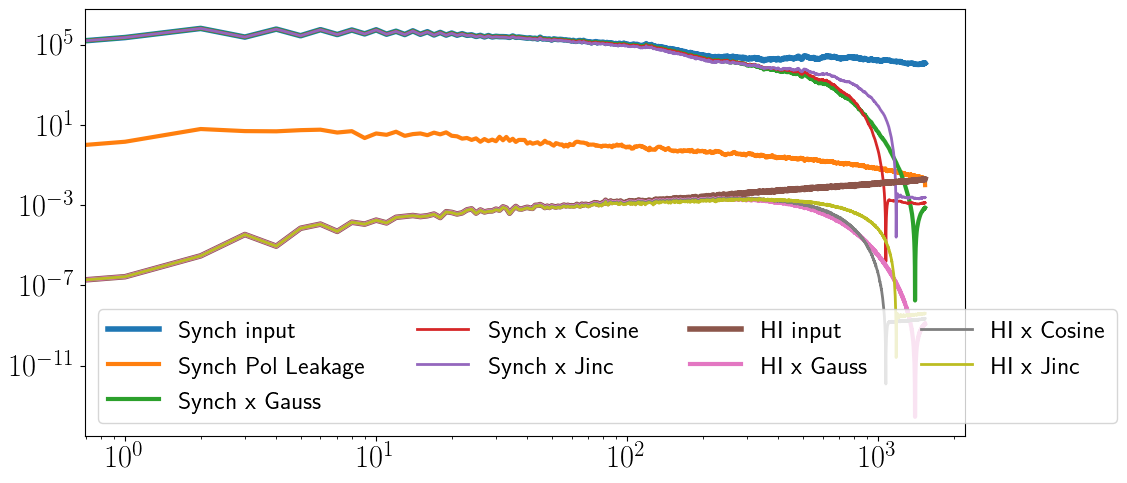

In [20]:
type_fwhm = ['ripple', 'smooth','constant','carucci2020']
grid = plt.GridSpec(1,1,top=1*1.,right=1*1.5,wspace=0.0,hspace=0.0)
ax = plt.subplot(grid[0,0])
fact = l*(l+1)/(2*np.pi)
plt.plot(l,fact*cl,          label="Synch input"   , linewidth=4,)
plt.plot(l,fact*clpol,          label="Synch Pol Leakage"   , linewidth=3, )
plt.plot(l,fact*cl*(blg**2), label="Synch x Gauss" , linewidth=3,      )
plt.plot(l,fact*cl*(blc**2), label="Synch x Cosine"  , linewidth=2,    )
plt.plot(l,fact*cl*(blj**2), label="Synch x Jinc" , linewidth=2,       )  

plt.plot(l,fact*clhi,          label="HI input"   , linewidth=4,)
plt.plot(l,fact*clhi*(blg**2), label="HI x Gauss" , linewidth=3,      )
plt.plot(l,fact*clhi*(blc**2), label="HI x Cosine"  , linewidth=2,    )
plt.plot(l,fact*clhi*(blj**2), label="HI x Jinc" , linewidth=2,       )  
    #if params["disable_ytick"]: ax.set_yticks([])    
#ax.set_ylim(1e-13,3e-2)
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend(fontsize="small", ncol=4);

In [21]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    import matplotlib as mpl
    import numpy as nplinewidths
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

In [22]:
#pset.colorFader(c1=c1,c2=c2)
c01='lightgrey' #blue
c02='black' #green

c11='lightblue' #blue
c12='black' #green

c21='bisque' #blue
c22='black' #green

c31='lightcyan' #blue
c32='black' #green

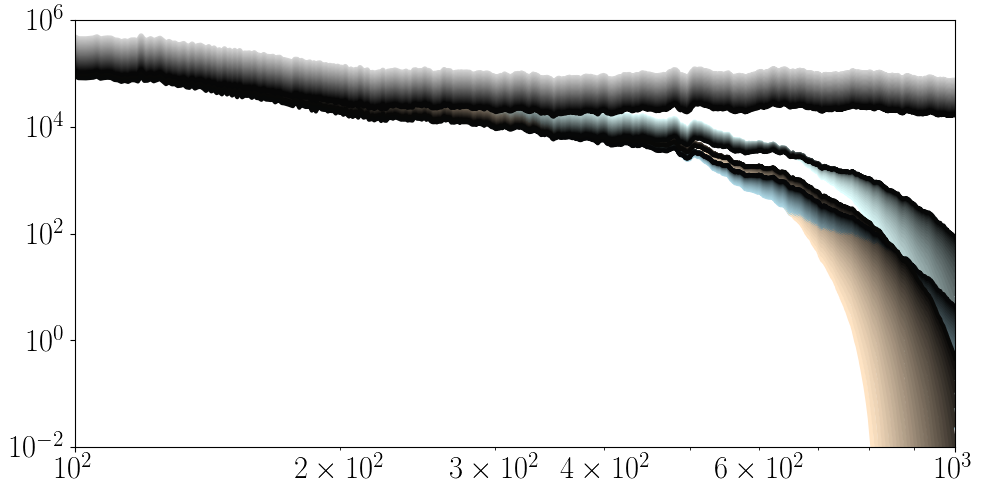

In [23]:
grid = plt.GridSpec(1,1,top=1*1.,right=1*1.5,wspace=0.0,hspace=0.0)
ax   = plt.subplot(grid[0,0])
nside = hp.get_nside(HI[0])
lmax  = 3*nside
l     = np.arange(lmax+1)
fact = l*(l+1)/(2*np.pi)
theta = np.arange(0,10,0.01)
for k in range(30):
    fwhm  = model.fwhm_modelling(nu=nu[k],type_='smooth', D=40, in_degree=True)
    blg   = model.bl_function(type_="gaussian", fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")
    blc   = model.bl_function(type_="cosine"  , fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")
    blj   = model.bl_function(type_="jinc"    , fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")
    cl    = hp.anafast(FG['I'][k],lmax=lmax, pol=False)
    #FGpl  = polarization_leakage(m=FG, eps_Q=LYGcoeff['Q'][-1],eps_U=LYGcoeff['U'][-1])
    #clpol = hp.anafast(FGpl[k],lmax=lmax, pol=False)    
    plt.plot(l,fact*cl,          label="Synch input"   , linewidth=4, color = pset.colorFader(c01,c02,k/30))
    plt.plot(l,fact*cl*(blg**2), label="Synch x Gauss" , linewidth=3, color = pset.colorFader(c11,c12,k/30))
    plt.plot(l,fact*cl*(blc**2), label="Synch x Gauss" , linewidth=3, color = pset.colorFader(c21,c22,k/30))
    plt.plot(l,fact*cl*(blj**2), label="Synch x Gauss" , linewidth=3, color = pset.colorFader(c31,c32,k/30))
ax.set_xlim(1e2,1e3)
ax.set_ylim(1e-2,1e6)
ax.set_xscale('log')
ax.set_yscale('log');

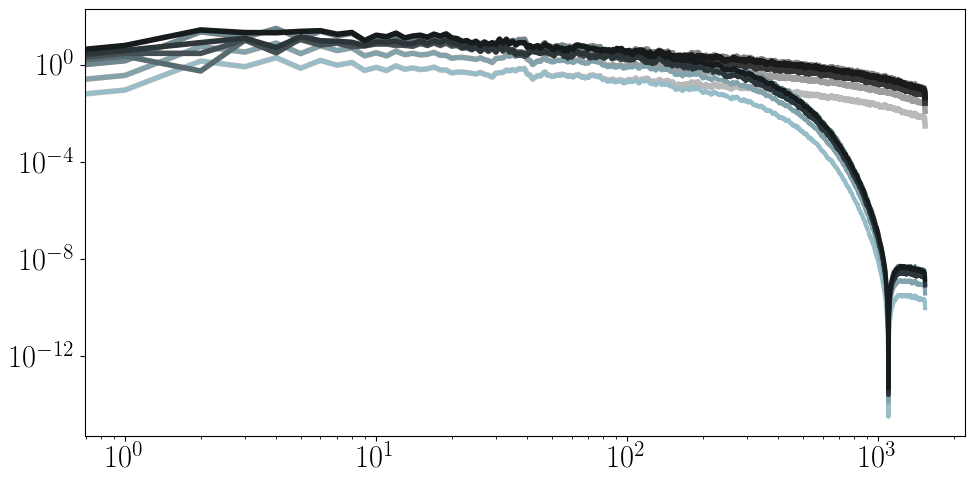

In [24]:
grid  = plt.GridSpec(1,1,top=1*1.,right=1*1.5,wspace=0.0,hspace=0.0)
ax    = plt.subplot(grid[0,0])
nside = hp.get_nside(HI[0])
lmax  = 3*nside
l     = np.arange(lmax+1)
fact  = l*(l+1)/(2*np.pi)
theta = np.arange(0,10,0.01)
k=0
fwhm  = model.fwhm_modelling(nu=nu[k],type_='smooth', D=40, in_degree=True)
bl    = model.bl_function(type_="gaussian", fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")
cl    = hp.anafast(FG['I'][k],lmax=lmax, pol=False)
for j in range(LYGcoeff['Q'].size):
    FGpl  = polarization_leakage(m=FG, eps_Q=LYGcoeff['Q'][j],eps_U=LYGcoeff['U'][j])
    clpol = hp.anafast(FGpl[k],lmax=lmax, pol=False)    
    plt.plot(l,fact*clpol,         label="Synch input"   , linewidth=4, color = colorFader(c01,c02,j/LYGcoeff['Q'].size))
    plt.plot(l,fact*clpol*(bl**2), label="Synch x Gauss" , linewidth=3, color = colorFader(c11,c12,j/LYGcoeff['Q'].size))
ax.set_xscale('log')
ax.set_yscale('log')
#plt.legend(fontsize="small", ncol=4);    

In [25]:
for i,inu in enumerate(nu):
    fwhm  = model.fwhm_modelling(nu=inu,type_='smooth', D=40, in_degree=True)
    if not i:
        Blg = model.bl_function(type_="gaussian", fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")
        Blc = model.bl_function(type_="cosine"  , fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")
        Blj = model.bl_function(type_="jinc"    , fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")
        Cl  = hp.anafast(FG['I'][i],lmax=lmax, pol=False)    
    else:
        Blg = np.vstack((Blg,model.bl_function(type_="gaussian", fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")))
        Blc = np.vstack((Blc,model.bl_function(type_="cosine"  , fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")))
        Blj = np.vstack((Blj,model.bl_function(type_="jinc"    , fwhm=fwhm, lmax=lmax, theta_=theta, input_unit="degree")))
        Cl  = np.vstack((Cl,hp.anafast(FG['I'][i],lmax=lmax, pol=False)))

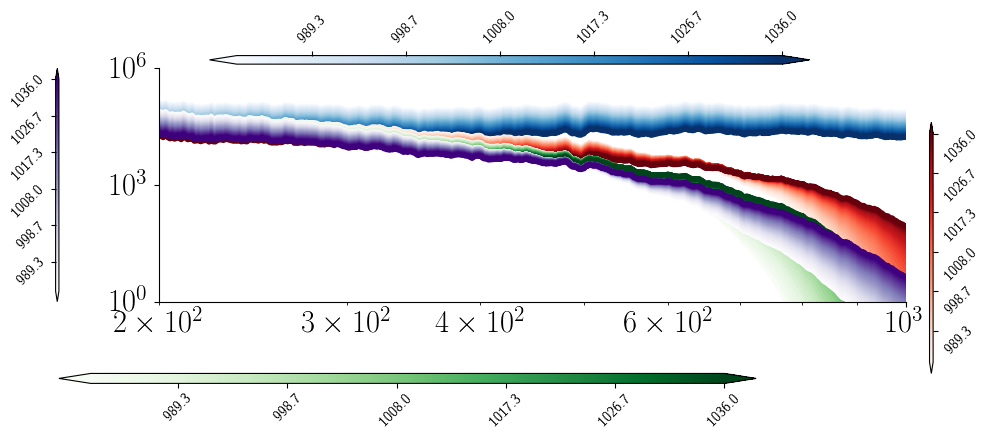

In [26]:
grid  = plt.GridSpec(1,1,top=1*1.,right=1*2,wspace=0.0,hspace=0.0)
ax    = plt.subplot(grid[0,0])
nside = hp.get_nside(HI[0])
lmax  = 3*nside
l     = np.arange(lmax+1)
fact  = l*(l+1)/(2*np.pi)
theta = np.arange(0,10,0.01)


len_  = 30
params = parset.params_standard()    
nu_ = nu[:len_]
params['xlims'] = [2e2,1e3]
params['ylims'] = [1e0,1e6]
params['cbar_ticks_scale_invert'] = False
params['cbar_ticks_decimals']     = 1
params['cbar_ticks_length']        = nu_.size 
params['cbar_label'] = np.array(2*[None])
params['fwhm']       = nu_
params['ylabel']     = np.array([None,None,None])
params['xlabel']     = np.array(3*[None])
params['cmap_list']  = ['Blues','Reds', 'Greens', 'Purples']
params['plot_add_text_true'] = False
params['n_lines']    = nu_.size
params['ticks_size'] = nu_.size  


for j, (jcmap,jloc,jshrink) in enumerate(zip(params['cmap_list'],['top','right','bottom','left'],[0.5,1.0,0.7,1.0])):
    params['cmap']         = jcmap    
    params['cbar_location']= jloc
    #params['cbar_shrink']  = jshrink
    pset.colorbar_setting(params)            
    for k in range(len_): 
        params['k']= 0#BRGP
        if not j:
            params['cbar_pad'] = 0.01
            params['cbar_shrink']  = 0.5
            plt.plot(l,fact*Cl[k], linewidth=4, color = params['cmap'].to_rgba(k + 1))
        elif j==1:
            params['cbar_pad'] = 0.02
            params['cbar_shrink']  = 0.7
            plt.plot(l,fact*Cl[k]*Blj[k]**2, linewidth=4, color = params['cmap'].to_rgba(k + 1))            
        elif j==2:
            params['cbar_pad'] = 0.2
            params['cbar_shrink']  = 0.7
            plt.plot(l,fact*Cl[k]*Blc[k]**2, linewidth=4, color = params['cmap'].to_rgba(k + 1))
        elif j==3:
            params['cbar_pad'] = 0.1
            params['cbar_shrink']  = 1
            plt.plot(l,fact*Cl[k]*Blg[k]**2, linewidth=4, color = params['cmap'].to_rgba(k + 1))            
            
    pset.colorbar_customization(params)
pset.plot_customization(ax=ax,params=params)
#ax.set_xlim(1e2,1e3)
#ax.set_ylim(1e-2,1e6)
ax.set_xscale('log')
ax.set_yscale('log')